In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud

# For better plots
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Ignore warnings for a clean output
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [3]:
#filepath
file_path = "fake_job_postings.csv"
df = pd.read_csv(file_path)

print(" Dataset loaded successfully.")
print("Shape:", df.shape)
df.head()

 Dataset loaded successfully.
Shape: (17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [17]:
# Check basic information
df.info()

# Check missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check how many real vs fake postings
print("Value counts for target variable:")
print(df['fraudulent'].value_counts())

# Calculate class balance
fraud_counts = df['fraudulent'].value_counts(normalize=True) * 100
print(f"Percentage of fake vs real job postings:\n{fraud_counts}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      17880 non-null  object
 6   description          17880 non-null  object
 7   requirements         17880 non-null  object
 8   benefits             17880 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      17880 non-null  object
 13  required_experience  17880 non-null  object
 14  required_education   17880 non-null  object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Fill missing text with empty string
text_cols = ['title', 'company_profile', 'description', 'requirements', 'benefits']
for col in text_cols:
    df[col] = df[col].fillna('')

# Fill missing categorical data with a placeholder
df['employment_type'] = df['employment_type'].fillna('unknown')
df['required_experience'] = df['required_experience'].fillna('unknown')
df['required_education'] = df['required_education'].fillna('unknown')

print("Missing values handled.")


Missing values handled.


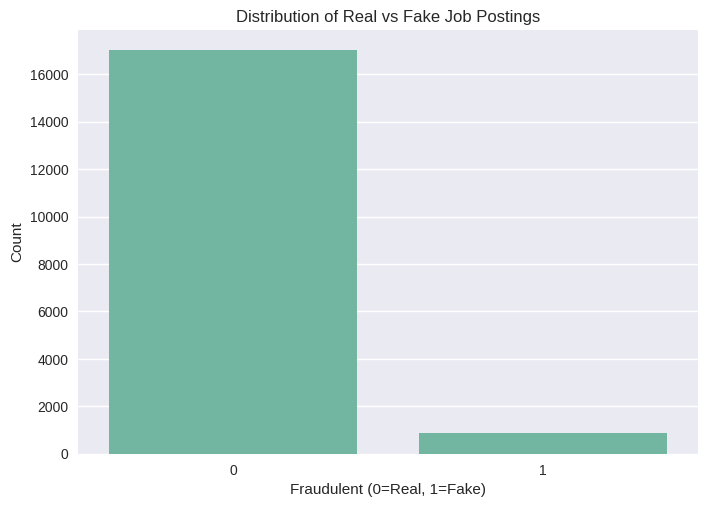

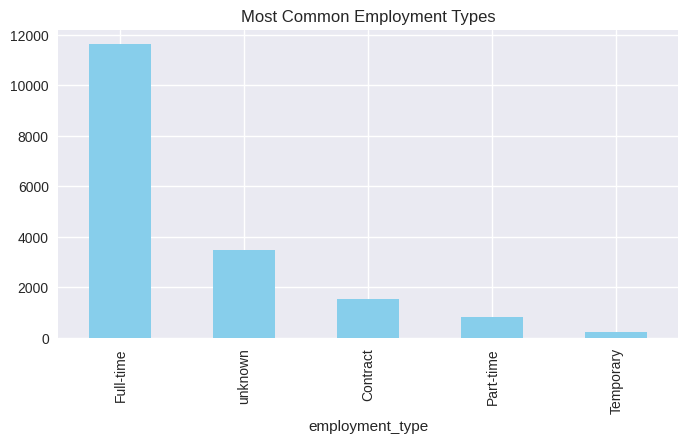

In [6]:
# Plot class distribution
sns.countplot(x='fraudulent', data=df)
plt.title("Distribution of Real vs Fake Job Postings")
plt.xlabel("Fraudulent (0=Real, 1=Fake)")
plt.ylabel("Count")
plt.show()

# Check Most Common Employment Types
plt.figure(figsize=(8,4))
df['employment_type'].value_counts().head(5).plot(kind='bar', color='skyblue')
plt.title("Most Common Employment Types")
plt.show()


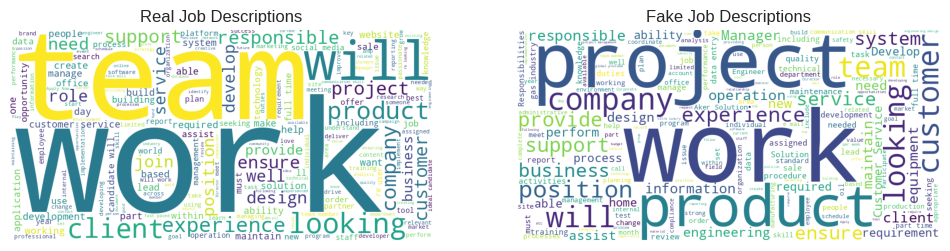

In [7]:
from wordcloud import WordCloud

# Separate real and fake postings
real_jobs = ' '.join(df[df['fraudulent']==0]['description'])
fake_jobs = ' '.join(df[df['fraudulent']==1]['description'])

# Generate word clouds
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(real_jobs))
plt.title("Real Job Descriptions")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400, background_color='white').generate(fake_jobs))
plt.title("Fake Job Descriptions")
plt.axis('off')
plt.show()


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)           # remove URLs
    text = re.sub(r'\d+', '', text)               # remove digits
    text = re.sub(r'[^\w\s]', '', text)           # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()      # remove extra spaces
    return text

# Apply to text columns
df['clean_description'] = df['description'].apply(clean_text)
print("Text cleaning completed.")


Text cleaning completed.


In [9]:
df['combined_text'] = (df['title'] + ' ' +
                       df['company_profile'] + ' ' +
                       df['description'] + ' ' +
                       df['requirements'] + ' ' +
                       df['benefits'])
df['combined_text'] = df['combined_text'].apply(clean_text)


In [10]:
# Check for missing values in target
print("Missing values in 'fraudulent':", df['fraudulent'].isnull().sum())

# Drop rows where the target is missing
df = df.dropna(subset=['fraudulent'])

# Also reset index (optional, for cleanliness)
df = df.reset_index(drop=True)

print("Missing target values removed.")


Missing values in 'fraudulent': 0
Missing target values removed.


In [13]:
X = df['combined_text']
y = df['fraudulent']

# Convert target to integer (just in case it’s float or string)
y = y.astype(int)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on training data and transform both train/test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF transformation complete.")
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)


TF-IDF transformation complete.
Train shape: (14304, 5000)
Test shape: (3576, 5000)


Accuracy: 0.9725950782997763

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3403
           1       1.00      0.43      0.60       173

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.80      3576
weighted avg       0.97      0.97      0.97      3576



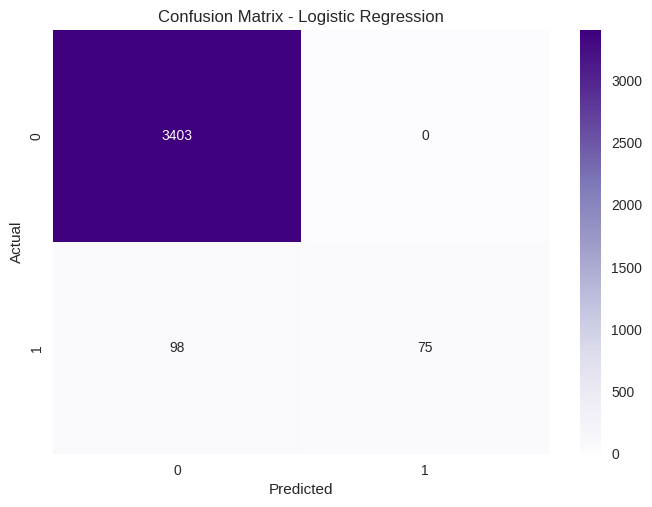

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
# Re-initialize Logistic Regression with class weighting
lr_model = LogisticRegression(max_iter=200, class_weight='balanced')
lr_model.fit(X_train_tfidf, y_train)

# Predict again
y_pred_bal = lr_model.predict(X_test_tfidf)

print("\nBalanced Model Report:\n", classification_report(y_test, y_pred_bal))



Balanced Model Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.62      0.88      0.73       173

    accuracy                           0.97      3576
   macro avg       0.81      0.93      0.86      3576
weighted avg       0.98      0.97      0.97      3576

